<a href="https://colab.research.google.com/github/pradeep2310/PyTorch/blob/main/Pytorch_Convolutional_neural_ntw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#convert MNIST image into a tensor(# of image , height, width, color channel)
transform= transforms.ToTensor()

In [3]:
#train data
train_d=datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34704469.26it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1132913.97it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9630685.27it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 13814741.67it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
#test data
test_d=datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [5]:
train_d

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_d

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
#create a small batch size for image
train_loader=DataLoader(train_d, batch_size=10, shuffle=True)
test_loader=DataLoader(train_d, batch_size=10, shuffle=False)

In [8]:
#describe convolutional layers
conv1=nn.Conv2d(1, 6, 3, 1)   # (input_channels , output_channels, kernel_size, stride). we cann't use padding bcz take a simple case there is no data change at boader of image.
conv2=nn.Conv2d(6, 16, 3, 1)

In [9]:
#grab 1 MNIST record/image
for i, (x_train, y_train) in enumerate(train_d):
  break

In [10]:
x_train.shape

torch.Size([1, 28, 28])

In [11]:
#change in 4-D batch
x=x_train.view(1,1,28,28)

In [12]:
#perform first convolution
x=F.relu(conv1(x))

In [13]:
#1 image, 6 filters we asked for, 26x26
x.shape

torch.Size([1, 6, 26, 26])

In [14]:
#pass through the pooling layer
x=F.max_pool2d(x,2,2) #kernel of 2 and stride of 2

In [15]:
x.shape    #26/2=13

torch.Size([1, 6, 13, 13])

In [16]:
#2nd convolutional layer
x = F.relu(conv2(x))

In [17]:
x.shape

torch.Size([1, 16, 11, 11])

In [18]:
#pooling layer
x= F.max_pool2d(x,2,2)

In [19]:
x.shape

torch.Size([1, 16, 5, 5])

In [20]:
#model class
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1= nn.Conv2d(1,6,3,1)
    self.conv2= nn.Conv2d(6,16,3,1)
    #need fullyconnected layer
    self.fc1= nn.Linear(5*5*16, 120) #120 is arbitary
    self.fc2= nn.Linear(120,84) #84 also arbitary
    self.fc3= nn.Linear(84,10)

  def forward(self,X):
    #1st pass
    X= F.relu(self.conv1(X))
    X= F.max_pool2d(X,2,2)  #2x2 kernel and stride 2
    #2nd pass
    X= F.relu(self.conv2(X))
    X= F.max_pool2d(X,2,2)

    #re-view to flatten it out
    X=X.view(-1,16*5*5) # -1  so that we can vary the batch size

    #fully connected layer
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)
    return F.log_softmax(X, dim=1)

In [21]:
#create an instance of model
torch.manual_seed(40)
model= CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
#loss functon optimizer
criterion= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr=0.001)

train and test

In [23]:
epochs=3
train_losses=[]
#for loop of epochs
for i in range(epochs):
  for b,(x_train, y_train) in enumerate(train_loader):
    b+=1 #start batches at 1
    y_pred=model(x_train)
    loss = criterion(y_pred, y_train)

    #update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%600 ==0:
      print(f'epoch: {i} batch: {b} loss: {loss.item()}')

  train_losses.append(loss)

epoch: 0 batch: 600 loss: 0.05366116017103195
epoch: 0 batch: 1200 loss: 0.10981855541467667
epoch: 0 batch: 1800 loss: 0.015050150454044342
epoch: 0 batch: 2400 loss: 0.1012982577085495
epoch: 0 batch: 3000 loss: 0.2725977897644043
epoch: 0 batch: 3600 loss: 0.04681536927819252
epoch: 0 batch: 4200 loss: 0.1764470636844635
epoch: 0 batch: 4800 loss: 0.03823375701904297
epoch: 0 batch: 5400 loss: 0.0025802268646657467
epoch: 0 batch: 6000 loss: 0.2589859068393707
epoch: 1 batch: 600 loss: 0.1057002916932106
epoch: 1 batch: 1200 loss: 0.09980103373527527
epoch: 1 batch: 1800 loss: 0.0013635980430990458
epoch: 1 batch: 2400 loss: 0.3398997187614441
epoch: 1 batch: 3000 loss: 0.0050917090848088264
epoch: 1 batch: 3600 loss: 0.011186908930540085
epoch: 1 batch: 4200 loss: 0.27855074405670166
epoch: 1 batch: 4800 loss: 0.01896403543651104
epoch: 1 batch: 5400 loss: 0.0003076041757594794
epoch: 1 batch: 6000 loss: 0.0005117886466905475
epoch: 2 batch: 600 loss: 0.0011765171075239778
epoch: 2

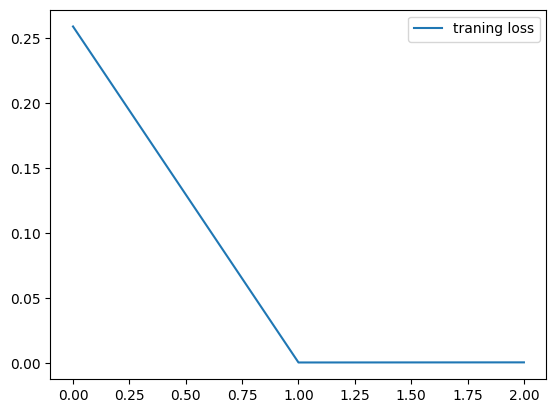

In [24]:
#loss at epoch
train_losses= [tl.item() for tl in train_losses]
plt.plot(train_losses, label='traning loss')
plt.legend()

In [25]:
test_data= DataLoader(test_d, batch_size=10000, shuffle=False)

In [26]:
with torch.no_grad():
  correct=0
  for x_test, y_test in test_data:
    y_val= model(x_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [27]:
len(test_data), len(test_d)

(1, 10000)

In [28]:
#test for correct
print(correct.item())
#in %
print(correct.item()/len(test_d)*100)

9856
98.56


In [29]:
# Grab an image
test_d[1978]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [30]:
# Grab just the data
test_d[1978][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [31]:
# Reshape it
test_d[1978][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

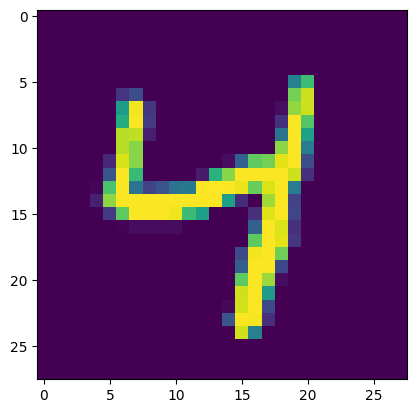

In [32]:
plt.imshow(test_d[1978][0].reshape(28,28))

In [33]:
# Pass the image through model
model.eval()
with torch.no_grad():
  new_prediction = model(test_d[1978][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28x28 image

In [34]:
#get probabilities
new_prediction

tensor([[-1.9067e+01, -1.0700e+01, -1.4585e+01, -1.8663e+01, -1.2034e-02,
         -1.1450e+01, -1.0803e+01, -9.4424e+00, -1.0152e+01, -4.4405e+00]])

In [35]:
new_prediction.argmax()

tensor(4)